#### Clase Paciente

In [1]:
import mysql.connector
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt


class Paciente():
    
    def __init__(self, numero_paciente, id, sexo, edad, entidad_res, resultado_antigeno, fecha_def):
        self.numero_paciente = numero_paciente
        self.id = id
        self.sexo = sexo
        self.edad = edad
        self.entidad_res = entidad_res
        self.resultado_antigeno = resultado_antigeno
        self.fecha_def = fecha_def
    
    def __str__(self):
        a = '\nNumero de paciente: {}\nId: {}\nSexo: {}\nEdad: {}\nEntidad de residencia: {}\nResultado antigeno: {}\nFecha defuncion: {}\n'
        return a.format(self.numero_paciente, self.id, self.sexo, self.edad, self.entidad_res, self.resultado_antigeno, self.fecha_def)
    
    
        
    
    

### Funciones para graficar

In [2]:
#-----------------------FUNCIONES PARA GRAFICAR--------------

def Graficar(x, y, nombrex, nombrey, etiqueta,colr):
    
    edad = x
    
    x = np.arange(len(edad)) #posicion de cata etiqueta en el eje x
    width = 0.35 #Ancho de las barras

    fig, ax = plt.subplots()
    
    rect = ax.bar(x, y, width, label= etiqueta, color=colr)
    
    ax.set_ylabel(nombrey) #Nombre a eje y
    ax.set_title(nombrex) #Nombre a eje x
    ax.set_xticks(x)
    ax.set_xticklabels(edad) 

    ax.legend() #Muestra con colores a que pertenece cada dato

    for rect in rect: #Añade etiquetas de manera individual a cada barra
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0.250),  # 0.250 points verticales de las etiquetas
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    fig.tight_layout()
    plt.show()
    
# ------------------------------------------------------------------

def Graficar2(x, y, nombrex, nombrey, etiqueta,colr):
    
    etiquetas = x
    
    x = np.arange(len(x)) #posicion de cata etiqueta en el eje x
    width = 0.35 #Ancho de las barras

    fig, ax = plt.subplots()
    
    rect = ax.bar(x, y, width, label= etiqueta, color=colr)
    
    ax.set_ylabel(nombrey) #Nombre a eje y
    ax.set_title(nombrex) #Nombre a eje x
    ax.set_xticks(x)
    ax.set_xticklabels(x) 

    ax.legend() #Muestra con colores a que pertenece cada dato
    
    ax.set_xticklabels(etiquetas, rotation=90) #Añadimos las etiquetas del eje x y el angulo de rotacion

    for rect in rect: #Añade etiquetas de manera individual a cada barra
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0.250),  # 0.250 points verticales de las etiquetas
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    fig.tight_layout()
    fig.set_size_inches(10, 10) #Modificamos el tamaño de la gráfica
    plt.show()


### Conexión con sql

In [3]:
dbConnect = {
    
        'host' : 'localhost',
        'user' : 'root',
        'password' : 'a28r10m95',
        'database' : 'basecovid'
}

conexion = mysql.connector.connect(**dbConnect)

cursor = conexion.cursor()  #Nos permite enviar y recibir datos al servidor


### Consulta a SQL

In [70]:
# HACEMOS CONSULTA A SQL DE TODOS LOS DATOS

sql = "select * from enero"

cursor.execute(sql)

data = cursor.fetchall()   #Almacena los datos en data


#HACEMOS CONSULTA A SQL DEL NOMBRE DE LAS COLUMNAS

sql = "SHOW COLUMNS FROM enero"

cursor.execute(sql)

nombre_columnas = cursor.fetchall()   #Almacena los datos en nombre_columnas

#for a in nombre_columnas:
#    print(a[0])
   
columnas = []
for nombre in nombre_columnas:
    columnas.append(nombre[0])
    
    
#CREAMOS UN DATAFRAME CON EL NOMBRE DE LAS COLUMNAS Y LOS DATOS 

data = pd.DataFrame(data, columns = columnas)


### Buscar  paciente

In [75]:
# Buscar un paciente 

while True:
    
    try:
        opc = int(input('Ingrese el número de paciente que desea buscar: '))
        
        if opc <= 0 or opc>999:
            raise Exception("Disculpa, solo pacientes entre 1 y 999")
            
        break
        
    except ValueError:
        print('Ingrese un paciente entre 1 y',len(data))

        

dic_sexo = {1: 'Masculino', 2: 'Femenino', 99: 'No especificado'}
dic_ResultAntig = {1: 'Positivo a a SARS-COV2', 2: 'Negativo a SARS-COV2', 97: 'No aplica (caso sin muestra)'}

paciente = data.iloc[opc-1]

numero = paciente[0] 
id_paciente = paciente[2] 
sexo = dic_sexo[paciente[6]]
edad = paciente[16]
entidad_residencia = paciente[7]  
resultado_antigeno = dic_ResultAntig[paciente[35]] 

if paciente[12] == '9999-99-99':
    fecha_def = 'Vivo'
else:
    fecha_def = paciente[12]



p = Paciente(numero, id_paciente, sexo, edad, entidad_residencia, resultado_antigeno, fecha_def)
print(p)





Ingrese el número de paciente que desea buscar: 994

Numero de paciente: 996
Id: 06b958
Sexo: Masculino
Edad: 32
Entidad de residencia: 9
Resultado antigeno: No aplica (caso sin muestra)
Fecha defuncion: 31/03/2020



### Eliminar paciente

In [76]:
# ELIMINAR PACIENTE   Ya elimine el resigtro 428, 661, 996, 997, 998, 999 1000

opc = int(input("Ingresa que paciente deseas eliminar: "))

print("\nHas eliminado al paciente: ", opc)


sql = 'delete FROM enero where NUMERO =' +  str(opc)

cursor.execute(sql)
conexion.commit()

Ingresa que paciente deseas eliminar: 996

Has eliminado al paciente:  996


### Conteo de casos agrupados por CLASIFICACION_FINAL


- Clave 1 - CASO DE COVID-19 CONFIRMADO POR ASOCIACIÓN CLÍNICA EPIDEMIOLÓGICA \\
- Clave 2 - CASO DE COVID-19 CONFIRMADO POR COMITÉ DE  DICTAMINACIÓN
- Clave 3 - CASO DE SARS-COV-2  CONFIRMADO
- Clave 4 - INVÁLIDO POR LABORATORIO
- Clave 5 - NO REALIZADO POR LABORATORIO
- Clave 6 - CASO SOSPECHOSO
- Clave 7- NEGATIVO A SARS-COV-2

Clave 3 hay 994 de casos

En total son 994 casos


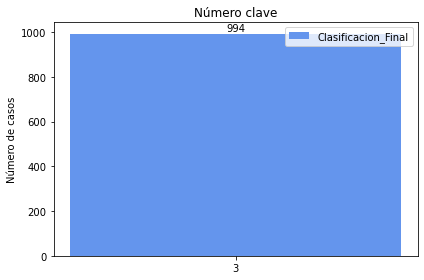

In [77]:
conteoClasFinal = []
valores = list(pd.unique(data['CLASIFICACION_FINAL'])) #Obtenemos todos los datos sin repetir, que hay en la
valores.sort()                                         #columna "CLASIFICACION_FINAL" y los ordenamos 
acum = 0
#Con este ciclo contamos cuantas veces aparece cada clave (1-7) en "Clasificacion final", los guardamos en una lista
#e imprimimos
for i in valores:
    cantidad_Clasificacion = data.groupby('CLASIFICACION_FINAL')['FECHA_ACTUALIZACION'].count()[i]
    conteoClasFinal.append(cantidad_Clasificacion)
    print("Clave",i, "hay",cantidad_Clasificacion, "de casos")
    acum = acum + cantidad_Clasificacion 

#print(conteoClasFinal)
print("\nEn total son",acum,"casos") #Con esto verificamos que el numero de casos coincida con el numero de filas del 
                                     # archivo csv

#Valores para graficar
x = valores
y = conteoClasFinal

  
Graficar(x ,y,'Número clave', 'Número de casos','Clasificacion_Final','cornflowerblue')


### Casos en la CDMX

AZCAPOTZALCO - 9 personas
COYOACÁN - 12 personas
CUAJIMALPA DE MORELOS - 23 personas
GUSTAVO A. MADERO - 26 personas
IZTACALCO - 3 personas
IZTAPALAPA - 17 personas
LA MAGDALENA CONTRERAS - 5 personas
MILPA ALTA - 1 personas
ÁLVARO OBREGÓN - 20 personas
TLÁHUAC - 4 personas
TLALPAN - 25 personas
XOCHIMILCO - 14 personas
BENITO JUÁREZ - 16 personas
CUAUHTÉMOC - 17 personas
MIGUEL HIDALGO - 35 personas
VENUSTIANO CARRANZA - 12 personas

En total son 239 casos en la CDMX


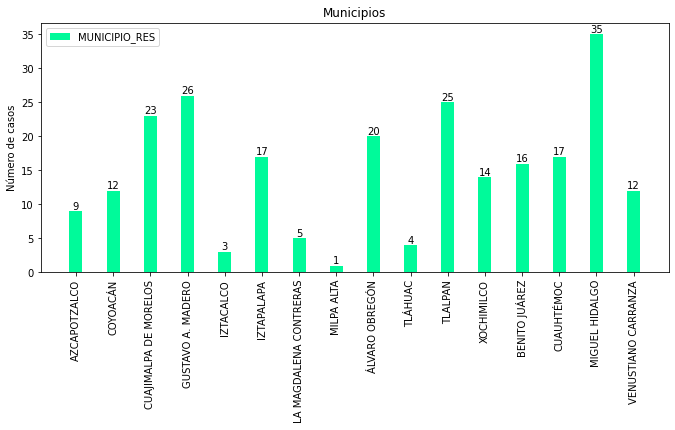

In [78]:
diccionario = {
    
    10 : 'ÁLVARO OBREGÓN',
    2 : 'AZCAPOTZALCO',
    14 : 'BENITO JUÁREZ',
    3 : 'COYOACÁN',
    4 : 'CUAJIMALPA DE MORELOS',
    15 : 'CUAUHTÉMOC',
    5 : 'GUSTAVO A. MADERO',
    6 : 'IZTACALCO',
    7 : 'IZTAPALAPA',
    8 : 'LA MAGDALENA CONTRERAS',
    16 : 'MIGUEL HIDALGO',
    9 : 'MILPA ALTA',
    999 : 'NO ESPECIFICADO',
    11 : 'TLÁHUAC',
    12 : 'TLALPAN',
    17 : 'VENUSTIANO CARRANZA',
    13 : 'XOCHIMILCO',
    106 : 'NO ESPECIFICADO/ ERROR',
    999 : 'NO ESPECIFICADO'
    
}

pacientes_cdmx = data[data['ENTIDAD_RES'] == 9] 

a = list(pd.unique(pacientes_cdmx['MUNICIPIO_RES']))       #Obtenemos todos los datos sin repetir, que hay en la
a.sort()                                                   #columna "MUNICIPIO_RES" de los pacientes de la cdmx

acum = 0
municipios = []

for i in a:
    conteo = pacientes_cdmx.groupby('MUNICIPIO_RES')['FECHA_ACTUALIZACION'].count()[i]
    municipios.append(conteo)
    print(diccionario[i], '-',conteo,'personas')
    acum = acum + conteo
    
print("\nEn total son",acum, "casos en la CDMX")

#datos para graficar
    
x = []

for i in a:
    x.append(diccionario[i])
    
y = municipios


#--------------------------------------

Graficar2(x, y, 'Municipios', 'Número de casos', 'MUNICIPIO_RES','mediumspringgreen')

    

###  SARS-COV-2 CONFIRMADO (por edades)

Casos con SARS-COV2 confirmado: 

0-20 años - 27
21-40 años - 356
41-60 años - 435
61 - 80 años - 158
81 años o mas - 18



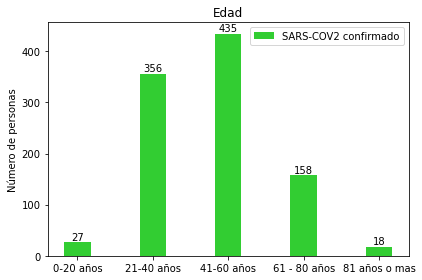

In [79]:
#Creams un dataframe para la clasificacion_final 3

data_clasif3 = data[data['CLASIFICACION_FINAL'] == 3] 


#Creamos una lista ordenada que tenga todas las edades (sin repetir) de la columna edad
#Edades

edades3 = np.sort(pd.unique(data_clasif3['EDAD'])).tolist()   

#Creamos una lista ordenada en base a la edad que tenga la frecuencia de cada edad

    
freq_edad3 = data_clasif3.groupby('EDAD')['FECHA_ACTUALIZACION'].count().tolist() #Frecuencia de edades
                     

#Con la función Intervalo obtendremos la suma de cuantas personas hay en edad de 0-20, 20-40, 40-60, 60-80 y mayores de 80
#Edad de [0,20] , (20,40], (40, 60], (60, 80], (80, ...)

def Intervalo(edad, freq):
    
    acum20 = 0
    acum40= 0
    acum60 = 0
    acum80 = 0
    acum100 = 0
    
    for i in range(len(edad)) :  
        
        if edad[i] >= 0 and edad[i] <= 20:
            acum20 = acum20 + freq[i]
            
        if edad[i] >= 21 and edad[i] <= 40:
            acum40 = acum40 + freq[i]
            
        if edad[i] >= 41 and edad[i] <= 60:
            acum60 = acum60 + freq[i]
            
        if edad[i] >= 61 and edad[i] <= 80:
            acum80 = acum80 + freq[i]
            
        if edad[i] >= 81:
            acum100 = acum100 + freq[i]
    
    return([acum20, acum40, acum60, acum80, acum100])


#Datos para graficar 

y = Intervalo(edades3, freq_edad3 )
x = ['0-20 años','21-40 años','41-60 años','61 - 80 años', '81 años o mas']

#IMPRIMOS

print("Casos con SARS-COV2 confirmado: \n")
for a in range(len(x)):
    print(x[a], '-', y[a])
print('')


#GRAFICAMOS CADA CASO
 
Graficar(x,y,'Edad', 'Número de personas', 'SARS-COV2 confirmado','limegreen')

### Pacientes intubados

Entubados:

Si - 92 personas
No - 227 personas
No aplica - 671 personas
No especificado - 4 personas

En total son 994 registros


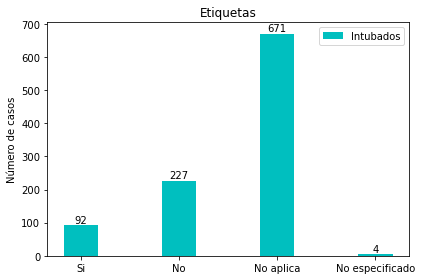

In [80]:
intubados = []
a = list(pd.unique(data['INTUBADO']))       #Obtenemos todos los datos sin repetir, que hay en la
a.sort()                                    #columna "INTUBADO" y los ordenamos 
    
diccionario = {1: 'Si', 2:'No', 97:'No aplica', 98:'Se ignora', 99:'No especificado'}
acum = 0

#Con este ciclo contamos cuantas veces aparece cada valor en "Entubado" y lo guardamos en una lista
#e imprimimos
print("Entubados:\n")
for i in a:
    conteo = data.groupby('INTUBADO')['FECHA_ACTUALIZACION'].count()[i]
    intubados.append(conteo)
    print(diccionario[i],'-',conteo, "personas" )
    acum = acum + conteo


#Con esto verificamos que el numero de casos coincida con el numero de filas del archivo csv
print("\nEn total son",acum,"registros") 

#Datos para graficar

y = intubados
x = []

#Con este for, obtenemos las etiquetas existentes en la columna "INTUBADOS" para asi tener el eje x

for i in a:
    x.append(diccionario[i])
    
#print(x)

Graficar(x, y, 'Etiquetas', 'Número de casos', 'Intubados','c')

### Conteo de pacientes finados

Pacientes vivos: 150
Pacientes finados: 844


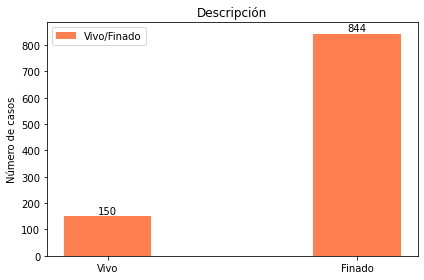

In [81]:
#Fecha de no defunción= '9999-99-99'

qepd = data[data['FECHA_DEF'] == '9999-99-99']
no_qepd = data[data['FECHA_DEF'] != '9999-99-99']

x = ['Vivo','Finado']
y = [len(no_qepd.index), len(qepd.index)]

print("Pacientes vivos:", y[0])
print("Pacientes finados:", y[1])

#Graficamos

Graficar(x, y, 'Descripción', 'Número de casos', 'Vivo/Finado','coral')

### Conteo de pacientes por sexo

Hay 407 mujeres y 587 hombres
Por lo tanto, hay más hombres que mujeres


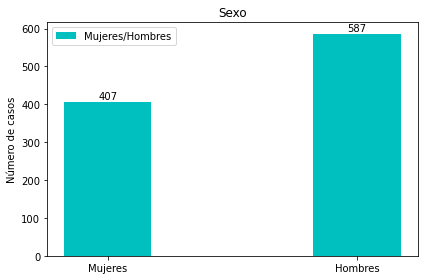

In [82]:
#1 = Mujer , 2 = Hombre

mujeres = data[data['SEXO'] == 1]
hombres = data[data['SEXO'] == 2]

print("Hay",len(mujeres.index), "mujeres y", len(hombres.index),"hombres")

if len(mujeres.index)>len(hombres.index):
    print("Por lo tanto, hay más mujeres que hombres")
else:
    print("Por lo tanto, hay más hombres que mujeres")
    
x = ['Mujeres','Hombres']
y = [len(mujeres.index), len(hombres.index)]

#Graficamos

Graficar(x, y, 'Sexo', 'Número de casos', 'Mujeres/Hombres', 'c')

### Cantidad de casos por sector

Estatal - 14 pacientes
IMSS - 311 pacientes
IMSS BIENESTAR - 1 pacientes
ISSSTE - 53 pacientes
Municipal - 1 pacientes
Pemex - 3 pacientes
Privada - 131 pacientes
Sedena - 4 pacientes
Semar - 4 pacientes
SSA - 459 pacientes
UNIVERSITARIO - 13 pacientes

En total son 994 casos


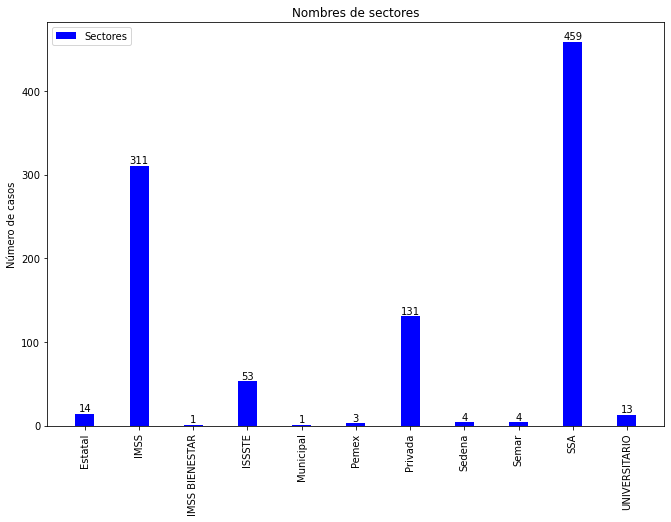

In [83]:
diccionario = {
    
    1 : 'Cruz Roja',
    2 : 'DIF',
    3 : 'Estatal',
    4 : 'IMSS',
    5 : 'IMSS BIENESTAR',
    6 : 'ISSSTE',
    7 : 'Municipal',
    8 : 'Pemex',
    9 : 'Privada',
    10 : 'Sedena',
    11 : 'Semar',
    12 : 'SSA',
    13 : 'UNIVERSITARIO',
    99 : 'No especificado',
    
}

valores = list(pd.unique(data['SECTOR'])) #Obtenemos una lista sin repetición de los datos de: SECTOR
valores.sort()                            #Ordenamos la lista

acum = 0
conteo_sector = []

for i in valores:
    conteo = data.groupby('SECTOR')['FECHA_ACTUALIZACION'].count()[i]
    conteo_sector.append(conteo)
    print(diccionario[i],"-", conteo, "pacientes")
    acum = acum + conteo
    
print("\nEn total son",acum,"casos") #Con esto verificamos que el numero de casos coincida con el numero de filas del 
                                     # archivo csv

    

x = []

for i in valores:
    x.append(diccionario[i])

y = conteo_sector

#Graficar

Graficar2(x, y, 'Nombres de sectores', 'Número de casos', 'Sectores', 'blue')

### Conteo de pacientes con diabetes hospitalizados

Pacientes con diabetes ambulatorios: 63
Pacientes con diabetes hospitalizados: 79
Pacientes con diabetes no especificados: 0


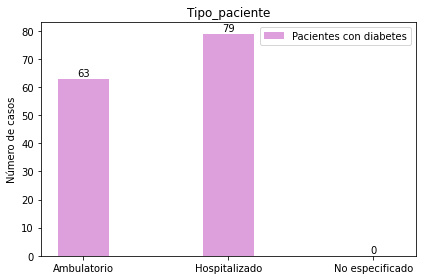

In [85]:
#Diabetes: 1 == si
#Tipo_paciente: 1 == Ambulatorio   
#               2 == Hospitalizado 
#               99 == No especificado

pacientes_diabetes = data[data['DIABETES'] == 1] 

pacientes_Ambu = pacientes_diabetes[pacientes_diabetes['TIPO_PACIENTE'] == 1] 
pacientes_Hospi = pacientes_diabetes[pacientes_diabetes['TIPO_PACIENTE'] == 2] 
pacientes_Noespe = pacientes_diabetes[pacientes_diabetes['TIPO_PACIENTE'] == 99] 

# GRAFICAMOS

x = ['Ambulatorio', 'Hospitalizado', 'No especificado']
y = [len(pacientes_Ambu.index), len(pacientes_Hospi.index), len(pacientes_Noespe.index)]

print("Pacientes con diabetes ambulatorios:", y[0])
print("Pacientes con diabetes hospitalizados:", y[1])
print("Pacientes con diabetes no especificados:", y[2])

Graficar(x, y, 'Tipo_paciente', 'Número de casos', 'Pacientes con diabetes','plum')